It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

In [78]:
# Download the data and save to a file called "housing.data."

import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve (data_url, "housing.data")


('housing.data', <httplib.HTTPMessage instance at 0x1180e1290>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for convenience. You may choose to edit the names, should you decide it would be more helpful to do so.


In [79]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
import csv
import numpy
new_data = []
with open('housing.data', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        new_data.append(row)
f.close()

new_data_title=[]
for row in new_data:
    for string in row:
        new_data_title.append(string.split())

print(len(new_data_title))
import numpy as np
new_data_title.insert(0,names)    

#print(new_data_title)


506


Load the data in through any method you choose. Make sure to include the column names so that you may conduct your analysis more easily.

Exercise 1: Conduct a brief integrity check of your data. This integrity check should include,
but is not limited to, checking for missing values and making sure all values make logical
sense. (i.e. Is one variable a percentage, but there are observations above 100%?) Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [80]:

count =0
count2=0
# B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#This parameter cannot be negative number because of power 2 and 1000
for ii in range(len(new_data_title)):
    #print(ii)
    if new_data_title[ii][11] <0:
        count = count +1
print("the number of false data for B:" , count)

# CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# the values can be 0 or 1

for ii in range(len(new_data_title)):
    #print(ii)
    if (new_data_title[ii][3] !=1 and new_data_title[ii][3] !=0):
        count2 = count2 +1
print("the number of false data for CHAS:" , count2)

import numpy as np
a = np.array(new_data_title)
print(a[:,3])

('the number of false data for B:', 0)
('the number of false data for CHAS:', 507)
['CHAS' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0' '0' '1'
 '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0'
 '0' '1' '0' '1' '1' '1' '1' '1' '0' '

Exercise 2: For what two attributes does it make the *least* sense to calculate mean and median? Why?

Answer) It makes the least sense to calculate mean for categorical variables like RAD. CHAS.

In [85]:

data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

data.head()

print data.corr()

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Exercise 3: Which two variables have the strongest linear association? Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*


Answer) Tax -ZN = 0.9
tax-index = 0.72

Exercise 4: Which variable has the most symmetric distribution? Which variable has the most left-skewed (negatively skewed) distribution? Which variable has the most right-skewed (positively skewed) distribution? (Do not scale for this exercise.) Defend your method for determining these variables.


In [86]:
import matplotlib.pyplot as plt
% matplotlib inline
data = data.cumsum()

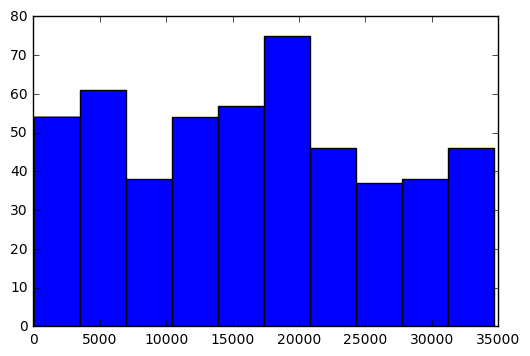

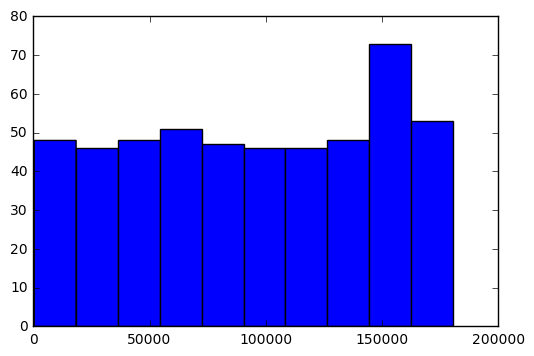

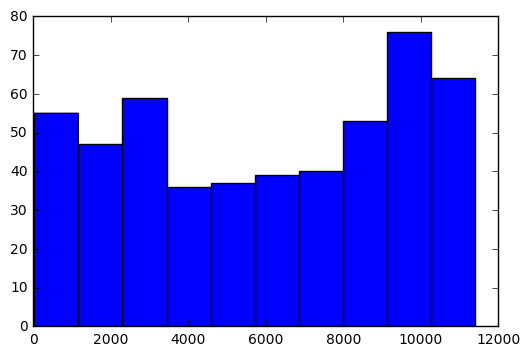

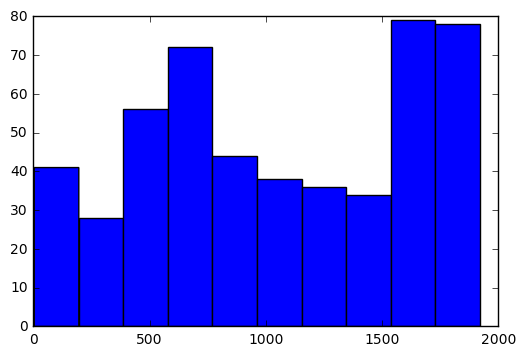

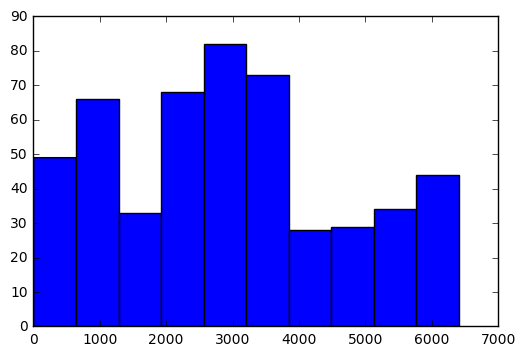

In [88]:


plt.hist(data['AGE'])
plt.show()
plt.hist(data['B'])
plt.show()
plt.hist(data['MEDV'])
plt.show()
plt.hist(data['DIS'])
plt.show()
plt.hist(data[ 'LSTAT'])
plt.show()

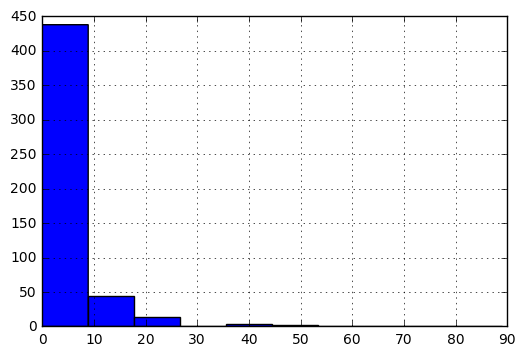

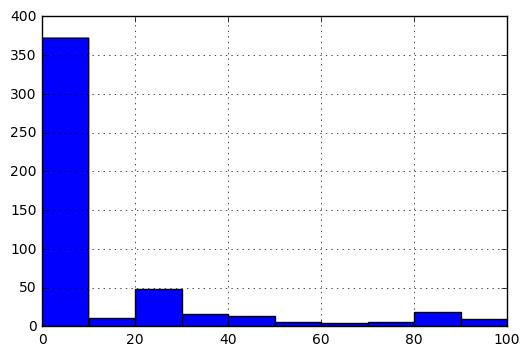

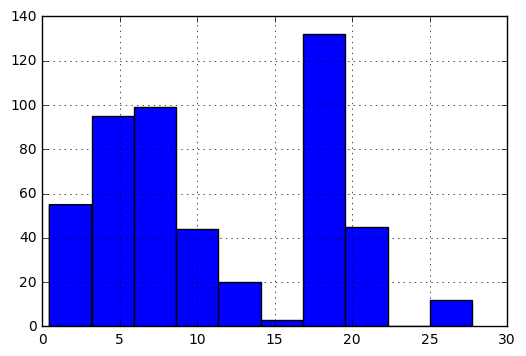

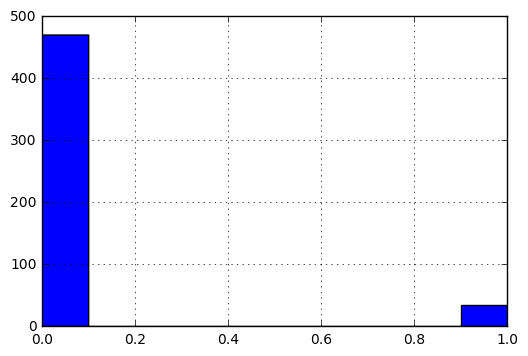

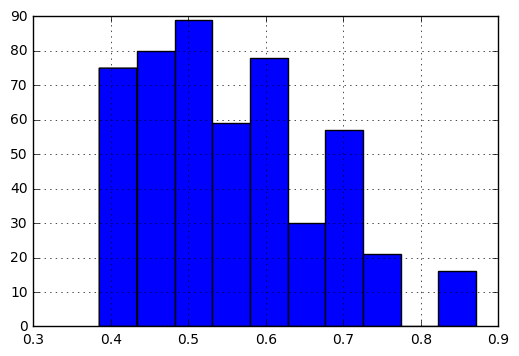

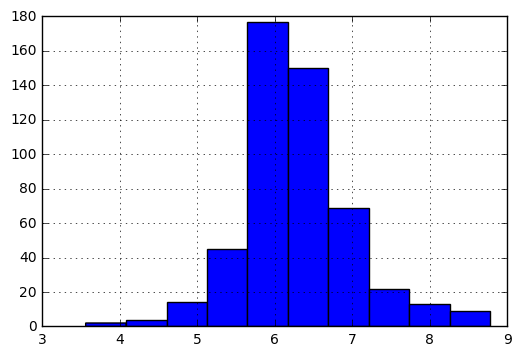

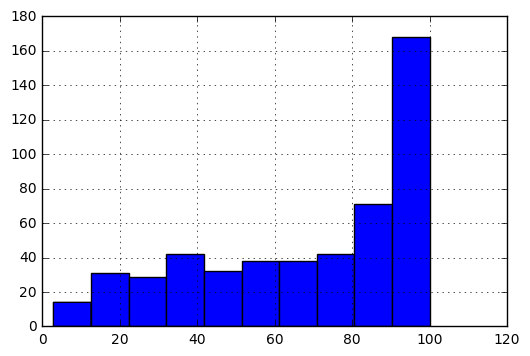

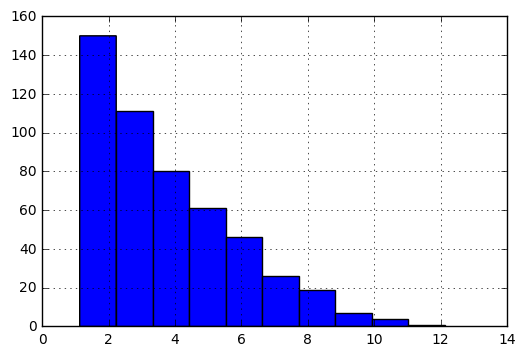

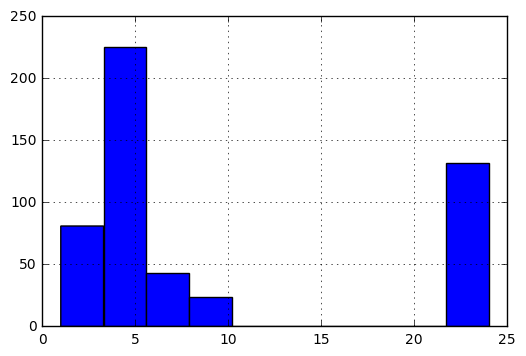

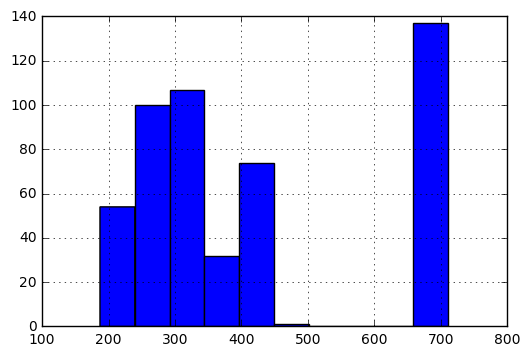

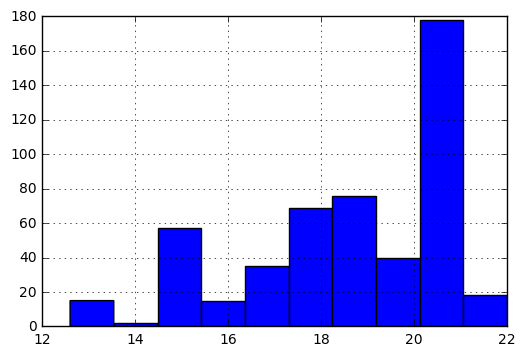

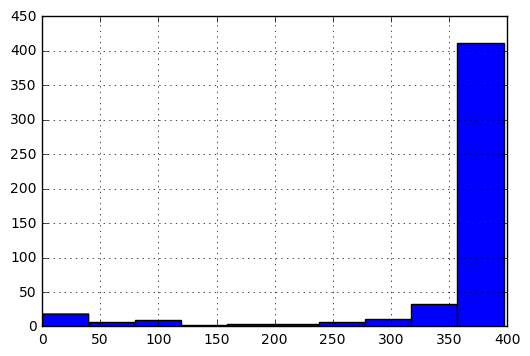

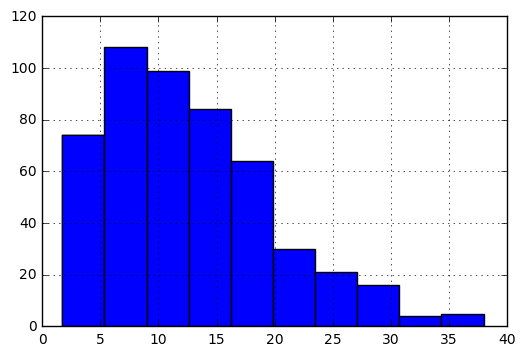

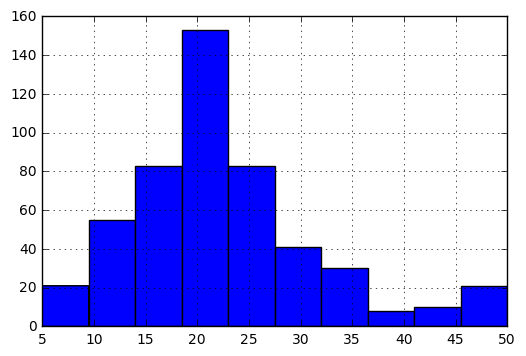

In [92]:

names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data['CRIM'].diff().hist()
plt.show()
data['ZN'].diff().hist()
plt.show()
data['INDUS'].diff().hist()
plt.show()
data['CHAS'].diff().hist()
plt.show()
data['NOX'].diff().hist()
plt.show()
data['RM'].diff().hist()
plt.show()
data['AGE'].diff().hist()
plt.show()
data['DIS'].diff().hist()
plt.show()
data['RAD'].diff().hist()
plt.show()
data['TAX'].diff().hist()
plt.show()
data['PTRATIO'].diff().hist()
plt.show()
data['B'].diff().hist()
plt.show()
data['LSTAT'].diff().hist()
plt.show()
data['MEDV'].diff().hist()
plt.show()


- Normal Distribution - MEDV
- Negatively Skewed (left skew)  -  AGE, B
- Positive Skewed (right skew) -  DIS, LSTAT

Exercise 5: As you may have noticed, the spread of the distribution contributed significantly to the numbers that helped you to answer Exercise 4. Repeat Exercise 4, but scale your results by the range of that variable.

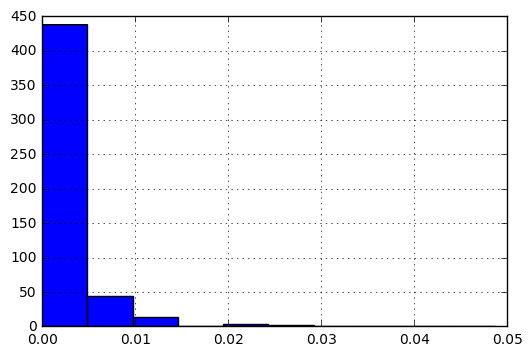

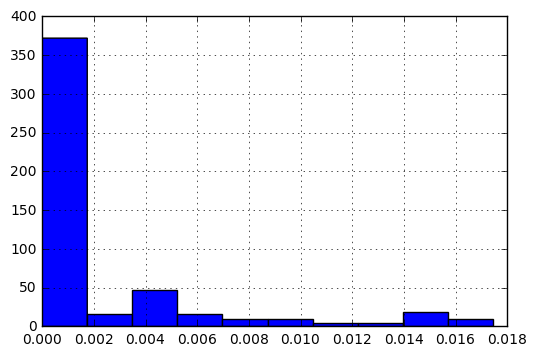

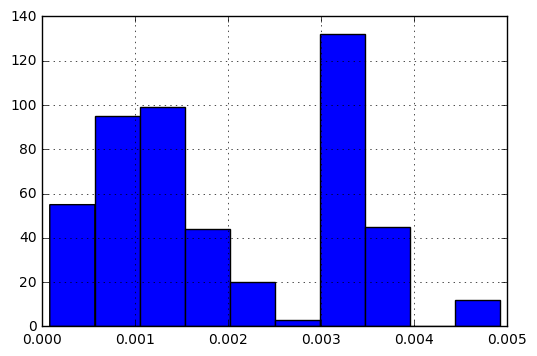

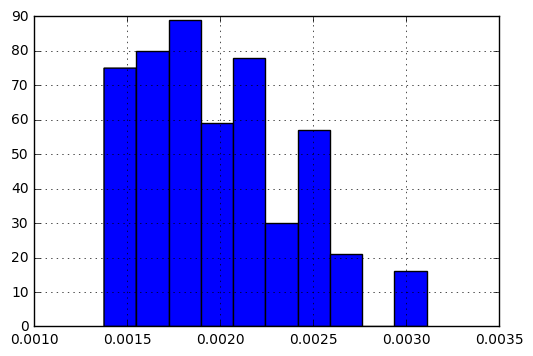

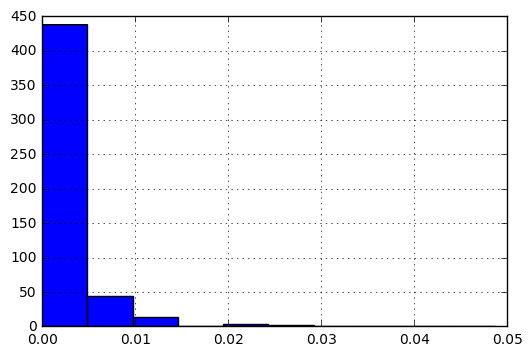

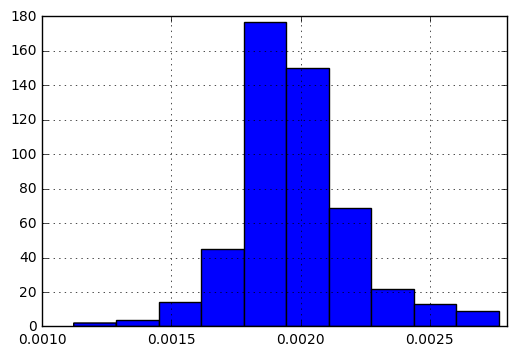

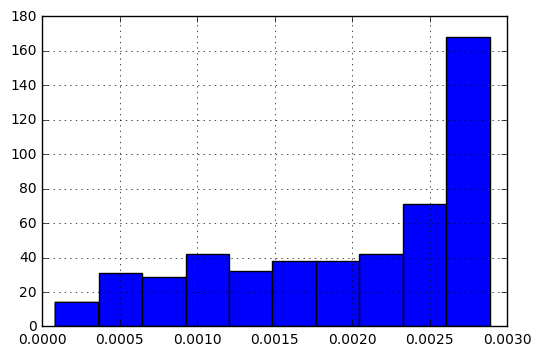

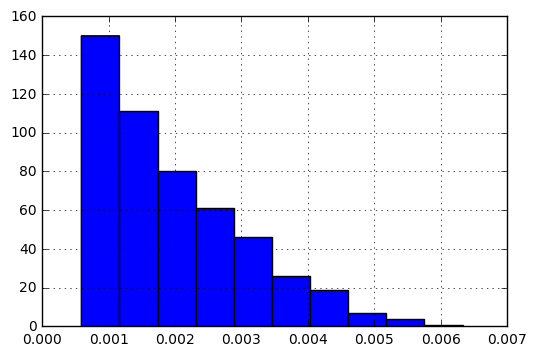

In [93]:
import copy
data_scale=copy.deepcopy(data)
data_scale -= data_scale.min()  # equivalent to df = df - df.min()

data_scale /= data_scale.max()
data_scale['CRIM'].diff().hist()
plt.show()
data_scale['ZN'].diff().hist()
plt.show()
data_scale['INDUS'].diff().hist()
plt.show()
data_scale['NOX'].diff().hist()
plt.show()
data_scale['CRIM'].diff().hist()
plt.show()
data_scale['RM'].diff().hist()
plt.show()
data_scale['AGE'].diff().hist()
plt.show()
data_scale['DIS'].diff().hist()
plt.show()

Exercise 6: Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics. If you feel there is additional information that is relevant, include it. 

In [70]:
print data['MEDV'].describe()
print data_scale['MEDV'].describe()

count      506.000000
mean      5992.188142
std       3530.907845
min          0.000000
25%       2756.450000
50%       6147.200000
75%       9486.850000
max      11377.600000
Name: MEDV, dtype: float64
count    506.000000
mean       0.527662
std        0.309685
min        0.002105
25%        0.243865
50%        0.541257
75%        0.834168
max        1.000000
Name: MEDV, dtype: float64


In [71]:
print data['CHAS'].describe()
print data_scale['CHAS'].describe()

count    506.000000
mean      17.673913
std       14.423111
min        0.000000
25%        0.000000
50%       20.000000
75%       35.000000
max       35.000000
Name: CHAS, dtype: float64
count    506.000000
mean       0.504969
std        0.412089
min        0.000000
25%        0.000000
50%        0.571429
75%        1.000000
max        1.000000
Name: CHAS, dtype: float64


In [72]:
print data['TAX'].describe()
print data_scale['TAX'].describe()

count       506.000000
mean      86797.276680
std       57327.718965
min           0.000000
25%       38190.250000
50%       81062.000000
75%      126129.500000
max      206272.000000
Name: TAX, dtype: float64
count    506.000000
mean       0.421620
std        0.277525
min        0.001433
25%        0.186313
50%        0.393856
75%        0.612028
max        1.000000
Name: TAX, dtype: float64


In [73]:
print data['RAD'].describe()
print data_scale['RAD'].describe()

count     506.000000
mean     1548.136364
std      1369.475296
min         0.000000
25%       519.000000
50%      1157.500000
75%      2160.000000
max      4831.000000
Name: RAD, dtype: float64
count    506.000000
mean       0.320599
std        0.283418
min        0.000207
25%        0.107616
50%        0.239756
75%        0.447227
max        1.000000
Name: RAD, dtype: float64


Exercise 7: Exercises 3 through 6 have used inferential statistics, descriptive statistics, or both. For each exercise, identify the branch of statistics on which you relied for your answer.

Exercise 8: It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. Set the seed equal to the sum of the first ten rows of 'RAD' and use the random.sample() function to select 50 observations. Find the mean of the 'AGE' of these observations. ([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [77]:
data_sample = data.sample(n=50)
data_sample.shape

(50, 14)

Exercise 9: In Exercise 8, identify the type of sampling used.

In [15]:
random

BONUS: Of the remaining types of sampling about which we learned, describe (but do not execute) how you might implement at least one of these types of sampling.